#### Student information should be written in this cell (Student ID, Student Name).

Name: NAJIB ATTAR

ID: 150220905


In [1]:
%load_ext autoreload
%autoreload 2

# HW2: UNSUPERVISED LEARNING WITH AUTOENCODERS

In this homework, you will implement two types of Autoencoders (Basic, and Variational) by using NumPy and PyTorch libraries. For the first question, you will implement and analyze a conventional autoencoder by using only NumPy. For the second question, you will implement a variational autoencoder by using PyTorch. For any of your questions, feel free to e-mail: ergunesr@itu.edu.tr .


## What is an Autoencoder?
An autoencoder is a neural network that is traind to reconstruct its input. It is an unsupervised learning algorithm, the goal is to learn an informative representation of the input data. In this homework, you will implement two autoencoder algorithms for unsupervised learning of an image dataset, MNIST. Before explaining the homework, we will briefly review what autoencoder is. 
    
Now suppose we have only an unlabeled training set 
$ \mathbf{x}=\{ x^{(1)}, x^{(2)}, x^{(3)}, \ldots \} $ , where $x^{(i)} \in \mathbb{R}^n $ . An autoencoder neural network is an unsupervised learning algorithm that applies backpropagation, setting the target values to be equal to the inputs. 
i.e., it uses $y^{(i)} = x^{(i)}$.

 The problem, is to learn the functions   $ A : \mathbb{R}^n \rightarrow \mathbb{R}^p $ (encoder) and  $ B : \mathbb{R}^p \rightarrow \mathbb{R}^n $ (decoder) that satisfy

$$
\arg\min_{A,B} \; \mathbb{E}\!\left[\Delta(\mathbf{x},\, (B \circ A)(\mathbf{x}))\right],
$$

where $ \mathbb{E} $ is the expectation over the distribution of $ \mathbf{x} $ , and  $ \Delta $ is the reconstruction loss function, which measures the distance between the output of the decoder and the input. The encoder $A$ and the decoder $B$ are neural networks.

If the input were completely **random**, say, each $x_i$ comes from an IID Gaussian independent, this compression task would be very difficult. But, if there is a structure in  the data, for example, if some of the input features are correlated, then this algorithm will be able to discover some of those correlations. Further, in the special case where $A$ and $B$ are linear operators, we get linear autoencoders. An autoencoder can be used for compressing the input, or for overcoming the curse of dimensionality. 

Below is an example autoencoder pipeline. Input is an image sample from MNIST dataset. 


![An example autoencoder](autoencoder_image.png)



#### Regularized Autoencoders

The trivial solution in Autoenconders training is solving for identity functions. if the capacity of the encoder and the decoder is large enough to encode each sample to an index, the model would simply overfit. To avoid this, we need regularization. The most common way to regularize an autoencoder is to impose a bottleneck. This means we will directly map the input $\mathbf{x}$ into a lower dimensional space. 

!!! As in many other machine learning models, an important tradeoff in autoencoders is the **bias-variance tradeoff**. On the one hand, we want the architecure of the autoencoder to be able to reconstruct the input well (i.e. reduce the reconstruction error). On the other hand, we want the low representation to generalize to a meaningful one. 



## Q1: Unsupervised learning of MNIST dataset (50 pts)

For the first part of this homework, the task is to implement an unsupervised learning autoencoder pipeline and train it by using MNIST dataset. For this part of the question, you are expected to provide NumPy implementation of your autoencoder. The encoder $A$ and decoder $B$ will each be **one-layer feed-forward neural networks**. 

The loss function of your autoencoder model will be Mean Squared Reconstruction error.

$$ L = \frac{1}{m} \sum_{i=1}^{m} \left\| x^{(i)} - \hat{x}^{(i)} \right\|^{2}
$$ 
where $\hat{x}^{(i)}$ s the reconstructed output of your autoencoder. The dimensionality of the bottleneck, e.g., the output of the encoder $A$, determines the quality of the reconstructed output $\hat{x}^{(i)}$. 


Formally, the **Encoder** is:  
  $$
  A(\mathbf{x}) = \sigma(W_e \mathbf{x} + b_e)
  $$

And the **Decoder** is:
  $$
  B(\mathbf{x}) = \sigma(W_d \mathbf{x} + b_d)
  $$

where $W_e, b_e$ are encoder parameters, $W_d, b_d$ are decoder parameters, $\sigma(\cdot)$ is an activation function (ReLU or sigmoid), $z = A(x)$ is the latent representation. 

Your tasks:
1. **Load and normalize the data**.

2. **Implement the forward pass** of encoder and decoder.  
3. **Compute the reconstruction loss** using Mean Squared Error:  
   $$
   L = \frac{1}{m} \sum_{i=1}^m \left\| x^{(i)} - \hat{x}^{(i)} \right\|^2
   $$
4. **Implement backpropagation manually using NumPy** to compute gradients  
   $$\frac{\partial L}{\partial W_e}, \frac{\partial L}{\partial b_e}, \frac{\partial L}{\partial W_d}, \frac{\partial L}{\partial b_d}$$.
5. **Update parameters with batch gradient descent. After training your model, reconstruct and visualize 10 random training samples and 10 random test samples from MNIST.** 
6. **Implement 3 different autoencoder using latent $z$ dimensions of 16, 32, and 64. Compare and discuss the reconstruction performance for each setting.**


Note that you only need **one encoder layer** and **one decoder layer**.



You will implement your **NumPy-based autoencoder** inside the file **`autoencoder.py`**.  
This file contains a complete class structure `autoencoder.py` with **empty method bodies** and clearly marked **TO DO** sections that you must fill in as part of your implementation.

## MNIST Dataset Overview

As mentioned before, we will work with the **MNIST handwritten digit dataset**. 

Each image is:
- Size: **28 × 28**
- Grayscale (single channel)
- Pixel values in the range **[0, 255]** (you may want to normalize them later)


Now, let's start by downloading the MNIST dataset. 

This cell downloads the MNIST handwritten digits dataset and saves it locally as mnist.npz for later loading and preprocessing.

In [2]:
import urllib.request

url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
save_path = "mnist.npz"

print("Downloading MNIST...")
urllib.request.urlretrieve(url, save_path)
print("Download complete: mnist.npz")

Download complete: mnist.npz


Once downloaded, load it by using NumPy:

**Load MNIST Dataset**  
This cell loads the MNIST images and labels from the downloaded `mnist.npz` file and prints the dataset shapes for verification.

In [3]:
import numpy as np

with np.load("mnist.npz") as data:
    x_train = data["x_train"]
    y_train = data["y_train"]
    x_test = data["x_test"]
    y_test = data["y_test"]

print("Shapes:", x_train.shape, x_test.shape)

Shapes: (60000, 28, 28) (10000, 28, 28)


**Normalize and Reshape**  
MNIST images are normalized to the range [0,1] and reshaped from (N, 28, 28) into column vectors of shape (784, N) to match the autoencoder implementation.

In [4]:
x_train = x_train.astype(np.float32) / 255.0
x_test  = x_test.astype(np.float32) / 255.0

X_train = x_train.reshape(x_train.shape[0], -1).T 
X_test  = x_test.reshape(x_test.shape[0], -1).T    

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("Train min/max:", X_train.min(), X_train.max())
print("Test  min/max:", X_test.min(), X_test.max())

X_train: (784, 60000) X_test: (784, 10000)
Train min/max: 0.0 1.0
Test  min/max: 0.0 1.0


We also visualize a few example digits so you can understand the structure of the data you will feed into your NumPy-based autoencoder.

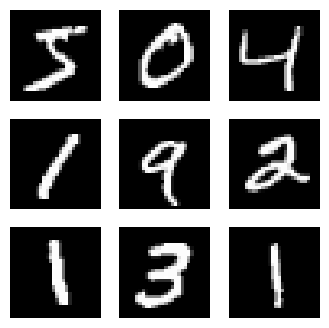

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()

Now, you are expected to normalize the data and implement the autoencoder pipeline. You may modify `autoencoder.py` according to your own requirements. To use your implementation, simply import the class from your file with:

**Training Autoencoders (h = 16, 32, 64)**  
This cell trains three autoencoders with different bottleneck sizes and reports the training loss per epoch and final test reconstruction loss.

In [6]:
from autoencoder import Autoencoder
import numpy as np
import matplotlib.pyplot as plt

hidden_dims = [16, 32, 64]
epochs = 20
batch_size = 128
lr = 0.05

results = {}

for h in hidden_dims:
    print(f"\n--- Training Autoencoder (Hidden Dim: {h}) ---")

    # Train only (no test evaluation here)
    ae = Autoencoder(input_dim=784, hidden_dim=h, learning_rate=lr)
    losses = ae.train(X_train, epochs=epochs, batch_size=batch_size, verbose=True)

    results[h] = {
        "model": ae,
        "losses": losses
    }



--- Training Autoencoder (Hidden Dim: 16) ---
Epoch 01/20 - loss: 57.035960
Epoch 02/20 - loss: 44.774386
Epoch 03/20 - loss: 40.963262
Epoch 04/20 - loss: 38.479559
Epoch 05/20 - loss: 36.584363
Epoch 06/20 - loss: 35.263148
Epoch 07/20 - loss: 34.317183
Epoch 08/20 - loss: 33.601581
Epoch 09/20 - loss: 33.031879
Epoch 10/20 - loss: 32.564058
Epoch 11/20 - loss: 32.178184
Epoch 12/20 - loss: 31.856065
Epoch 13/20 - loss: 31.590002
Epoch 14/20 - loss: 31.408360
Epoch 15/20 - loss: 31.234141
Epoch 16/20 - loss: 31.116893
Epoch 17/20 - loss: 30.992040
Epoch 18/20 - loss: 30.914773
Epoch 19/20 - loss: 30.826120
Epoch 20/20 - loss: 30.775229

--- Training Autoencoder (Hidden Dim: 32) ---
Epoch 01/20 - loss: 52.327246
Epoch 02/20 - loss: 41.450346
Epoch 03/20 - loss: 35.939587
Epoch 04/20 - loss: 32.435428
Epoch 05/20 - loss: 30.082323
Epoch 06/20 - loss: 28.340548
Epoch 07/20 - loss: 26.955653
Epoch 08/20 - loss: 25.810338
Epoch 09/20 - loss: 24.847970
Epoch 10/20 - loss: 24.029374
Epoch 

**Final Reconstruction Loss Summary**  
This cell reports the final training and test reconstruction losses for each latent dimension, showing improved performance with larger bottleneck sizes.

In [7]:
print("\n--- Final Reconstruction Loss Summary (Autoencoder) ---")

for h in hidden_dims:
    ae = results[h]["model"]

    # Reconstruct test set
    z_test = ae.encoder(X_test)
    Xhat_test = ae.decoder(z_test)

    # Compute test loss and store it
    test_loss = ae.compute_loss(X_test, Xhat_test)
    results[h]["test_loss"] = test_loss
    results[h]["Xhat_test"] = Xhat_test

    print(f"h={h:<2} | final train loss={results[h]['losses'][-1]:.6f} | test loss={test_loss:.6f}")



--- Final Reconstruction Loss Summary (Autoencoder) ---
h=16 | final train loss=30.775229 | test loss=30.550969
h=32 | final train loss=19.845258 | test loss=19.425822
h=64 | final train loss=11.401772 | test loss=11.006396


In [8]:
print("\n--- Final Test Loss Comparison (Autoencoder) ---")
for h in hidden_dims:
    print(f"Latent Dim {h} -> Test MSE: {results[h]['test_loss']:.4f}")


--- Final Test Loss Comparison (Autoencoder) ---
Latent Dim 16 -> Test MSE: 30.5510
Latent Dim 32 -> Test MSE: 19.4258
Latent Dim 64 -> Test MSE: 11.0064


**Training Loss Curves**  
This plot compares training loss for autoencoders with latent sizes 16, 32, and 64. Larger latent sizes achieve lower reconstruction loss due to higher capacity.

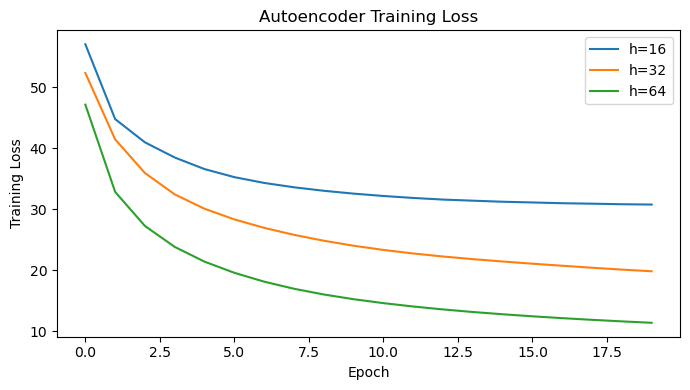

In [9]:
plt.figure(figsize=(7, 4))
for h in hidden_dims:
    plt.plot(results[h]["losses"], label=f"h={h}")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.tight_layout()
plt.show()

**Reconstruction Visualization**  
This helper function displays original MNIST digits and their reconstructions to visually compare reconstruction quality for different latent sizes.

In [10]:
def show_reconstructions(X, Xhat, n=10, title="Reconstructions"):
    plt.figure(figsize=(2*n, 4))
    for i in range(n):
        # original
        plt.subplot(2, n, i+1)
        plt.imshow(X[:, i].reshape(28,28), cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        if i == 0:
            plt.title("Original")

        # reconstructed
        plt.subplot(2, n, n+i+1)
        plt.imshow(Xhat[:, i].reshape(28,28), cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        if i == 0:
            plt.title("Reconstructed")
    plt.suptitle(title)
    plt.show()

**Training Set Reconstructions**
This figure shows autoencoder reconstructions for training images.  
These results illustrate how well the model fits the training data and serve as a reference for comparison with test set reconstructions.

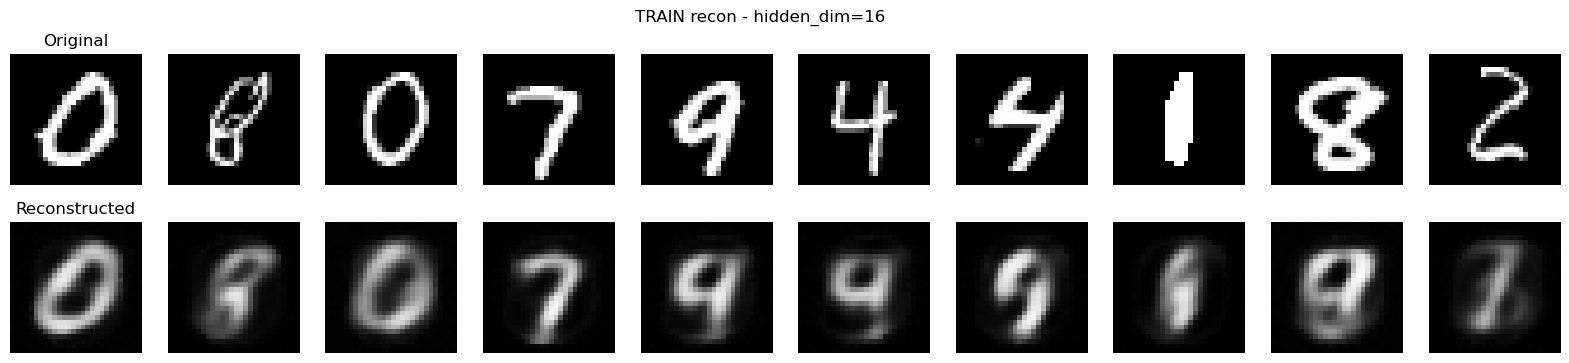

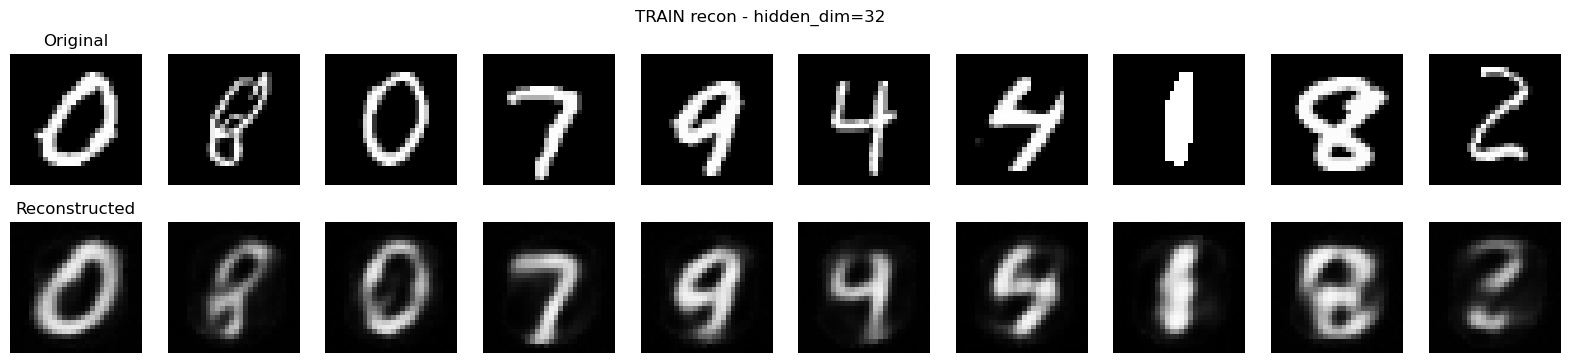

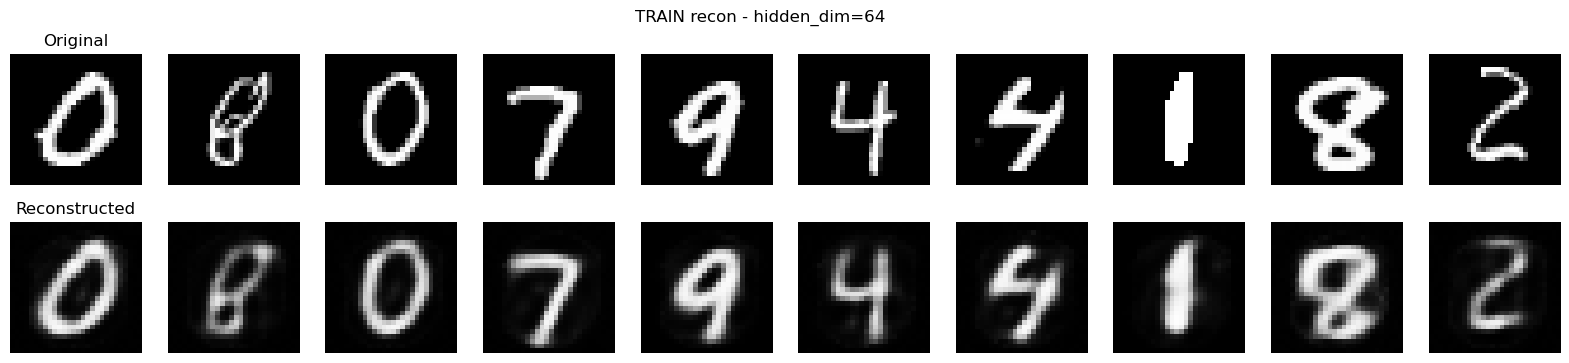

In [11]:
# --- RANDOM 10 training samples (reproducible) ---
rng = np.random.default_rng(0)
train_idx = rng.choice(X_train.shape[1], size=10, replace=False)
X_train_sample = X_train[:, train_idx]

for h in hidden_dims:
    ae = results[h]["model"]
    z_train = ae.encoder(X_train_sample)
    Xhat_train = ae.decoder(z_train)
    show_reconstructions(X_train_sample, Xhat_train, n=10,
                         title=f"TRAIN recon - hidden_dim={h}")


As expected, reconstruction quality improves as latent dimension increases (h=16 is blurrier due to stronger compression, while h=64 preserves more detail).

**Test Set Reconstructions**  
This figure shows autoencoder reconstructions for unseen test images, demonstrating that reconstruction quality improves as the latent dimension increases and that the model generalizes beyond the training data.

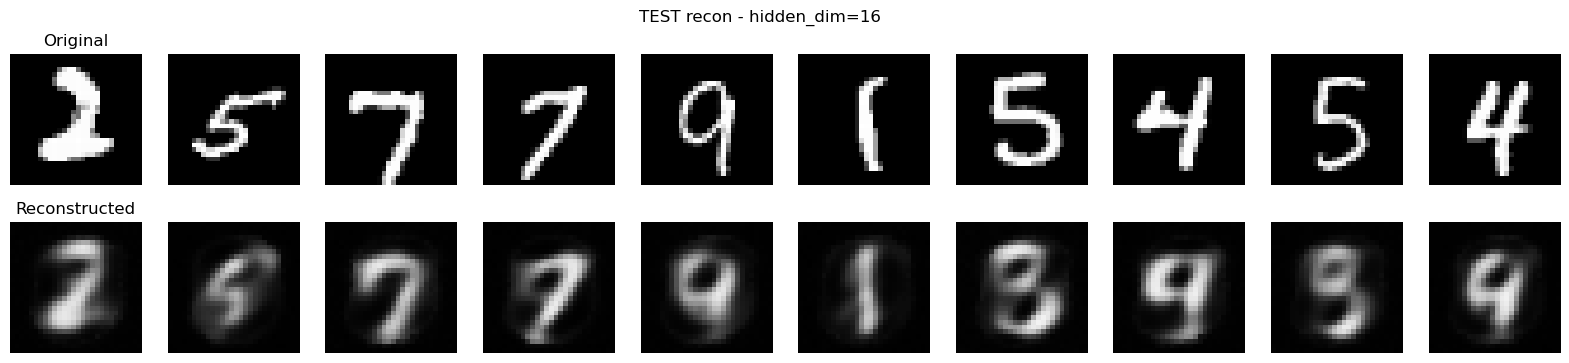

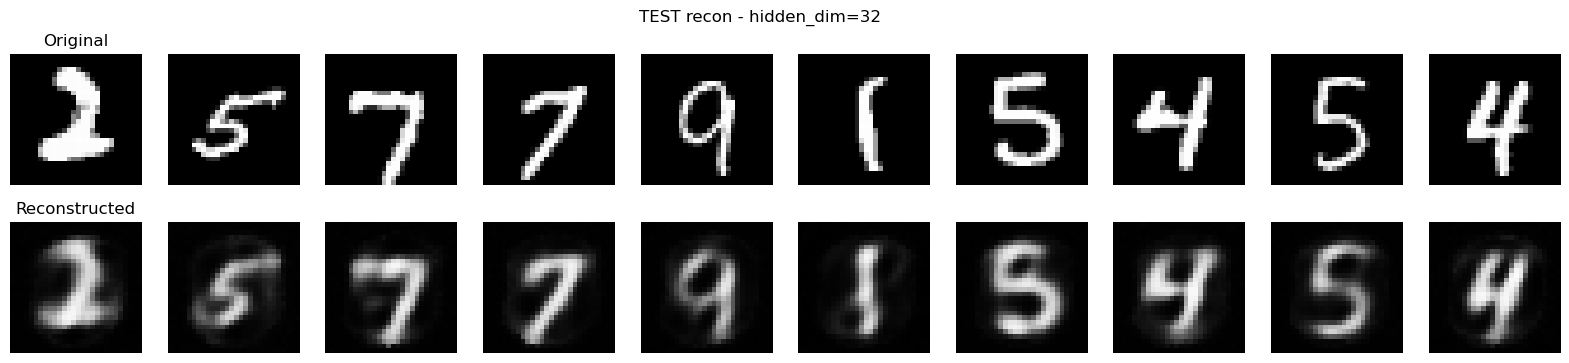

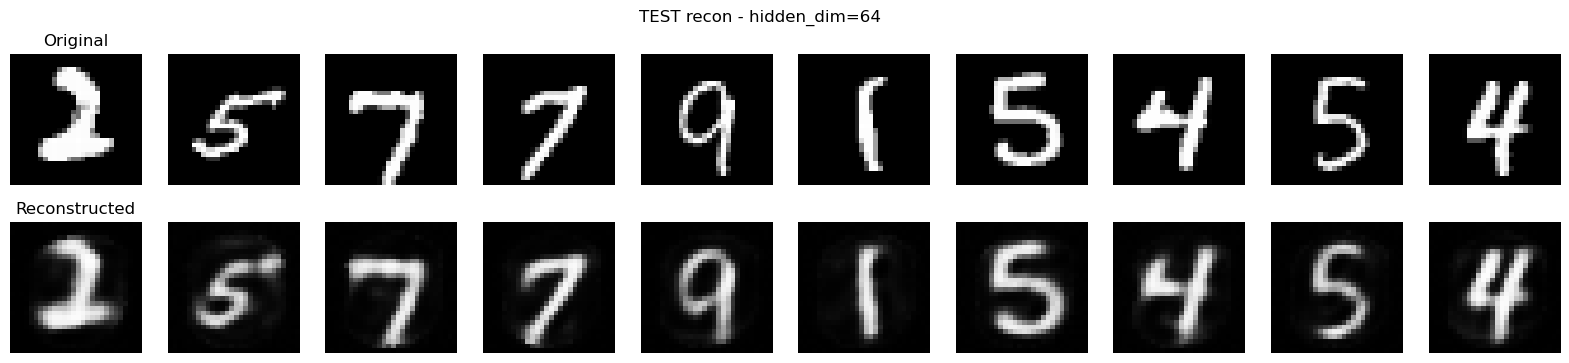

In [12]:
# --- RANDOM 10 test samples (reproducible) ---
rng = np.random.default_rng(0)
test_idx = rng.choice(X_test.shape[1], size=10, replace=False)
X_sample = X_test[:, test_idx]

for h in hidden_dims:
    Xhat_sample = results[h]["Xhat_test"][:, test_idx]
    show_reconstructions(X_sample, Xhat_sample, n=10,
                         title=f"TEST recon - hidden_dim={h}")


**Reconstruction Value Range Check**  
This sanity check confirms that reconstructed images remain within the normalized [0,1] range.

In [13]:
print("X_test min/max:", float(X_test.min()), float(X_test.max()))
for h in [16, 32, 64]:
    Xhat = results[h]["Xhat_test"]
    print(f"h={h} Xhat min/max:", float(Xhat.min()), float(Xhat.max()))

X_test min/max: 0.0 1.0
h=16 Xhat min/max: 0.0016337653037281836 0.9877097339592965
h=32 Xhat min/max: 0.0008082221188349161 0.9937095788535459
h=64 Xhat min/max: 0.00019741003888154568 0.9973465526816883


## Structure in Embeddings 
In a trained autoencoder, the embedding space should reflect the structure of the data, mapping similar images to nearby points. Select two images from the MNIST training set, compute their embeddings using the encoder, and generate interpolated embeddings between them. Decode these interpolated embeddings and visualize the reconstructions to observe the smooth transitions. Repeat the procedure for two images of different digits. Implement this process in PyTorch and analyze how the embedding space captures the semantic similarity between digits.

**Latent Interpolation (Autoencoder)**  
Two training images are encoded into latent vectors and linearly interpolated. Decoding the interpolated latents produces smooth transitions. The same-digit interpolation changes style smoothly, while different-digit interpolation gradually morphs between classes.

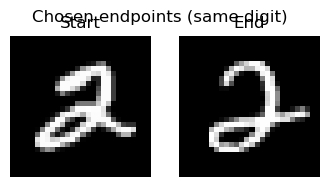

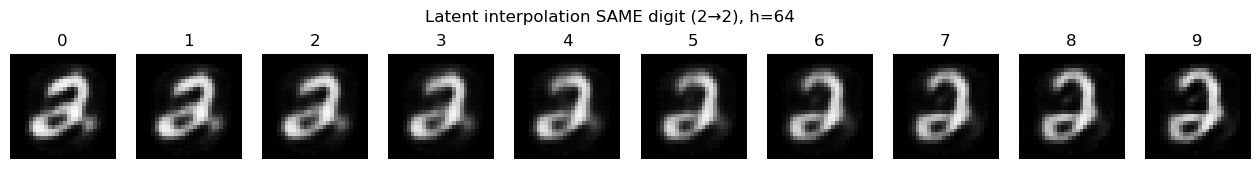

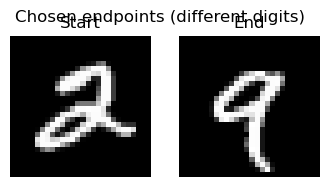

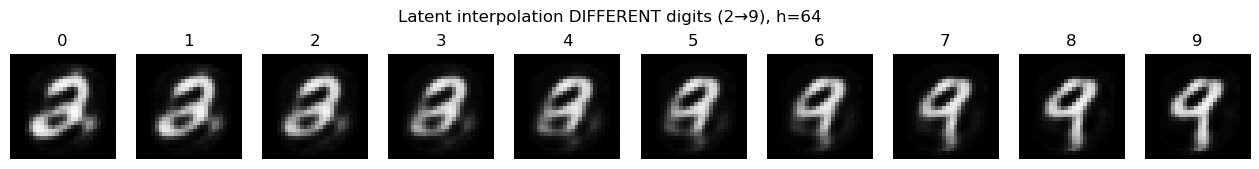

Note: PyTorch version of this interpolation is repeated in the VAE (PyTorch) section.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def pick_digit(X, y, digit, which=0):
    inds = np.where(y == digit)[0]
    idx = inds[which]
    return X[:, idx:idx+1]  # (784,1)

def interpolate_and_decode(ae, x1, x2, steps=10):
    z1 = ae.encoder(x1)   # (h,1)
    z2 = ae.encoder(x2)   # (h,1)

    alphas = np.linspace(0, 1, steps)
    decoded = []
    for a in alphas:
        z = (1-a)*z1 + a*z2
        xhat = ae.decoder(z)          # (784,1)
        decoded.append(xhat.reshape(28,28))
    return decoded

def plot_row(imgs, title=""):
    steps = len(imgs)
    plt.figure(figsize=(1.6*steps, 2))
    for i, im in enumerate(imgs):
        plt.subplot(1, steps, i+1)
        plt.imshow(im, cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        plt.title(f"{i}")
    plt.suptitle(title)
    plt.show()

# Choose which trained AE to analyze (best is 64)
h = 64
ae = results[h]["model"]

# ---- SAME DIGIT (example: 2 -> 2) ----
x1 = pick_digit(X_train, y_train, digit=2, which=0)
x2 = pick_digit(X_train, y_train, digit=2, which=1)

# show chosen endpoints
plt.figure(figsize=(4,2))
plt.subplot(1,2,1); plt.imshow(x1.reshape(28,28), cmap="gray"); plt.axis("off"); plt.title("Start")
plt.subplot(1,2,2); plt.imshow(x2.reshape(28,28), cmap="gray"); plt.axis("off"); plt.title("End")
plt.suptitle("Chosen endpoints (same digit)")
plt.show()

same_imgs = interpolate_and_decode(ae, x1, x2, steps=10)
plot_row(same_imgs, title=f"Latent interpolation SAME digit (2→2), h={h}")

# ---- DIFFERENT DIGITS (example: 2 -> 9) ----
x3 = pick_digit(X_train, y_train, digit=2, which=0)
x4 = pick_digit(X_train, y_train, digit=9, which=0)

# show chosen endpoints
plt.figure(figsize=(4,2))
plt.subplot(1,2,1); plt.imshow(x3.reshape(28,28), cmap="gray"); plt.axis("off"); plt.title("Start")
plt.subplot(1,2,2); plt.imshow(x4.reshape(28,28), cmap="gray"); plt.axis("off"); plt.title("End")
plt.suptitle("Chosen endpoints (different digits)")
plt.show()

diff_imgs = interpolate_and_decode(ae, x3, x4, steps=10)
plot_row(diff_imgs, title=f"Latent interpolation DIFFERENT digits (2→9), h={h}")

print("Note: PyTorch version of this interpolation is repeated in the VAE (PyTorch) section.")

**Analysis:**  
For the same digit (2→2), the decoded images change smoothly in writing style while preserving digit identity, indicating that nearby latent points represent semantically similar images.  
For different digits (2→9), the interpolation produces a gradual morph between classes, suggesting the embedding space captures a continuous structure where semantic changes correspond to moving across regions of the latent space.

## Part 1 Discussion (Autoencoder)
The standard autoencoder learns a deterministic low-dimensional representation of the MNIST images by minimizing reconstruction error.  
As the hidden dimension increases from 16 to 64, the reconstruction quality improves, since the model has more capacity to preserve image details.

However, larger hidden dimensions reduce the level of compression and may lead to diminishing returns in reconstruction quality.  
This experiment demonstrates the trade-off between compression and reconstruction accuracy in standard autoencoders.

## Q2 - Unsupervised learning of MNIST dataset by using Variational Autoencoders (50 pts)

A **Variational Autoencoder (VAE)** is a **probabilistic generative model** that learns a **latent distribution** of the data instead of just deterministic embeddings like a standard autoencoder.  

VAEs enable us to sample new data points. Generative models capture the underlying dynamics of the data distributions, and can generate new samples according to them.

Just like a standard Autoencoder, a VAE consists of two main components: An Encoder and a Decoder. The Encoder maps an input $\mathbf{x}$ to a **latent distribution** $q_\phi(z|x)$, parameterized by a mean $\mu$ and log-variance $\log \sigma^2$.  

The Decoder samples the latent representation $z \sim q_\phi(z|x)$ and reconstructs the input via $p_\theta(x|z)$. In VAE, instead of learning the latent representations directly, we are trying to learn the distributions that generate the latent representations.

**For MNIST, you will use the following parameters as before:**
- Input: 28×28 images (flattened to 784-dim vectors)
- Latent dimensions: 16, 32, or 64
- Encoder: 784 → hidden_dim → 2 × latent_dim (outputs $\mu$ and $\log \sigma^2$ )
- Decoder: latent_dim → hidden_dim → 784 (reconstructs the image)

In this question, you will need to use ReLU as encoder's activation function, and Sigmoid for Decoder's activation functions.


### The Loss Function

The VAE is trained by maximizing the **Evidence Lower Bound (ELBO)**:

$$ 
\mathcal{L}(\theta, \phi; x) = \mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)] - D_{KL}\big(q_\phi(z|x) \parallel p(z)\big)
$$

Where the first term is a reconstruction loss and the second term is KL-divergence term. The reconstruction loss measures how well the decoder reconstructs the input. For MNIST, **Binary Cross-Entropy (BCE)** is commonly used.

### **KL Divergence**  

$$
D_{KL}\big(q_\phi(z|x) \parallel p(z)\big) = -\frac{1}{2} \sum_{i=1}^{d} \big(1 + \log \sigma_i^2 - \mu_i^2 - \sigma_i^2\big)
$$ 

Regularizes the latent distribution $q_\phi(z|x)$ to be close to the prior $ p(z) = \mathcal{N}(0, I)$.



### Reparameterization Trick

Directly sampling $z \sim q_\phi(z|x)$ is **non-differentiable**, which prevents backpropagation. To fix this, we use reparameterization trick in computation of the forward pass. Reparameterization is an essential trick for training a variational autoencoder. The latent representation is computed by using the following expression, instead of being directly sampled from $q_\phi(z|x)$. 

$$ 
z = \mu + \sigma \odot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)
$$

This way, the gradients to flow through $\mu$ and $\sigma$ during training. For each neuron, there exists be a $\mu$ and a $\sigma$ parameter.


### Using PyTorch in This Homework


In this question, we will use **PyTorch**, a popular open-source library for **deep learning** and **tensor computations**. PyTorch provides tools for building neural networks, automatic differentiation, and efficient computation on **CPU** or **GPU**. For this homework, a **CPU-only setup is sufficient**.

You can install PyTorch by running:

```python
!pip install torch torchvision torchaudio

#### Some useful PyTorch components you will need: (For more you can check PyTorch documents.)
- **Tensors** (`torch.Tensor`) for storing and manipulating data. Think of them as multidimensional arrays, similar to NumPy arrays.
- **`torch.nn.Module`** to define neural network models.
- **`torch.nn.functional`** for activation functions, loss functions, and other operations.
- **`torch.optim`** for optimization routines like SGD or Adam.
- **Automatic differentiation** via `tensor.backward()` to compute gradients.

#### What You Will Implement Manually?
While PyTorch handles gradients and basic tensor operations, you will need to implement **the autoencoder and variational autoencoder architectures**, the **forward pass**, the **reparameterization trick** for the VAE, and **the training loop** manually. This will help you understand the underlying mechanics of these models.

Here, you are provided with a template file `VAE.py`. Your task is to **fully implement all the methods in this file**. This includes:  

- **Encoder**: maps input images to the latent mean and log-variance vectors.  
- **Reparameterization**: samples latent vectors from the encoder’s distribution.  
- **Decoder**: reconstructs images from latent vectors.  
- **Forward pass**: integrates encoder, reparameterization, and decoder.  
- **Loss computation**: combines reconstruction loss and KL divergence.  
- **Training loop**: updates model parameters using an optimizer.  

Then, you can import your module, and call the functions in the following cell to implement this question.

In [15]:
from VAE import VAE, vae_loss

**Sanity Check: VAE Forward Pass and Loss**
This cell verifies that the VAE forward pass produces outputs with correct shapes  
(**x_hat**, **mu**, **logvar**) and confirms that the VAE loss function returns a single scalar value.

In [16]:
import torch
from VAE import VAE, vae_loss

# Create model
latent_dim = 16
model = VAE(input_dim=784, hidden_dim=400, latent_dim=latent_dim)

# Fake batch: 8 images, each flattened to 784 and normalized (0..1)
x = torch.rand(8, 784)

# Forward
x_hat, mu, logvar = model(x)

print("x shape      :", x.shape)
print("x_hat shape  :", x_hat.shape)
print("mu shape     :", mu.shape)
print("logvar shape :", logvar.shape)

# Value range check (decoder uses sigmoid)
print("x_hat min/max:", x_hat.min().item(), x_hat.max().item())

# Loss should be a single scalar
loss = vae_loss(x, x_hat, mu, logvar)
print("loss:", loss.item())


x shape      : torch.Size([8, 784])
x_hat shape  : torch.Size([8, 784])
mu shape     : torch.Size([8, 16])
logvar shape : torch.Size([8, 16])
x_hat min/max: 0.27055564522743225 0.7400192618370056
loss: 4400.80712890625


In [17]:
#from VAE import VAE

##### TO DO: Implement the encoder network to output mean and log-variance #####
##### TO DO: Implement the reparameterization trick to sample latent vectors #####
##### TO DO: Implement the decoder network to reconstruct images from latent vectors #####
##### TO DO: Implement the full forward pass (encoder -> reparameterization -> decoder) #####
##### TO DO: Compute the reconstruction loss (e.g., MSE or BCE) #####
##### TO DO: Compute the KL divergence loss for the latent distribution #####
##### TO DO: Combine reconstruction + KL loss to form the total loss #####
##### TO DO: Update model parameters using an optimizer (e.g., Adam) #####
##### TO DO: Train your VAE for latent sizes 16, 32, and 64 #####
##### TO DO: Visualize reconstructed images and optionally latent space samples #####
##### TO DO: Report your training metrics and plots such as training loss plot. #####
##### TO DO: Compare and discuss reconstruction quality and latent space structure #####

## Training Variational Autoencoders (latent_dim = 16, 32, 64)
This cell prepares the MNIST dataset for PyTorch and trains three VAEs with different latent dimensions.  
For each model, the training loss per epoch is recorded and the trained models are stored for later evaluation and visualization.

In [18]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Prepare MNIST tensors for VAE ---
# x_train, x_test are normalized in numpy (0..1) from Q1.
# Convert to torch and flatten to (N, 784)
x_train_t = torch.from_numpy(x_train.reshape(x_train.shape[0], -1)).float()  # (60000, 784)
x_test_t  = torch.from_numpy(x_test.reshape(x_test.shape[0], -1)).float()    # (10000, 784)

# Use TensorDataset so DataLoader returns (xb,) consistently
train_ds = torch.utils.data.TensorDataset(x_train_t)
test_ds  = torch.utils.data.TensorDataset(x_test_t)

train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=128, shuffle=True, drop_last=True
)
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=128, shuffle=False, drop_last=False
)

def train_vae(latent_dim, epochs=15, lr=1e-3):
    model = VAE(input_dim=784, hidden_dim=400, latent_dim=latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []

    print(f"\n--- Training VAE (Latent Dim: {latent_dim}) ---")
    model.train()

    for ep in range(1, epochs + 1):
        total_loss = 0.0
        n_samples = 0

        for (xb,) in train_loader:
            xb = xb.to(device)

            optimizer.zero_grad()
            x_hat, mu, logvar = model(xb)
            loss = vae_loss(xb, x_hat, mu, logvar)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            n_samples += xb.size(0)

        avg_loss = total_loss / n_samples  # average per sample
        train_losses.append(avg_loss)
        print(f"Epoch {ep:>2}/{epochs}, Loss: {avg_loss:8.4f}")

    return model, train_losses

# ---- Train for 16/32/64 ----
latent_dims = [16, 32, 64]
vae_results = {}

for ld in latent_dims:
    model, losses = train_vae(latent_dim=ld, epochs=15, lr=1e-3)
    vae_results[ld] = {"model": model, "losses": losses}


Using device: cpu

--- Training VAE (Latent Dim: 16) ---
Epoch  1/15, Loss: 164.3640
Epoch  2/15, Loss: 121.0609
Epoch  3/15, Loss: 114.8853
Epoch  4/15, Loss: 111.9881
Epoch  5/15, Loss: 110.2210
Epoch  6/15, Loss: 109.0390
Epoch  7/15, Loss: 108.1206
Epoch  8/15, Loss: 107.4294
Epoch  9/15, Loss: 106.8870
Epoch 10/15, Loss: 106.4061
Epoch 11/15, Loss: 106.0592
Epoch 12/15, Loss: 105.7265
Epoch 13/15, Loss: 105.3990
Epoch 14/15, Loss: 105.1349
Epoch 15/15, Loss: 104.9227

--- Training VAE (Latent Dim: 32) ---
Epoch  1/15, Loss: 167.2051
Epoch  2/15, Loss: 124.0278
Epoch  3/15, Loss: 115.7828
Epoch  4/15, Loss: 112.2754
Epoch  5/15, Loss: 110.2459
Epoch  6/15, Loss: 108.9475
Epoch  7/15, Loss: 107.9936
Epoch  8/15, Loss: 107.3406
Epoch  9/15, Loss: 106.7955
Epoch 10/15, Loss: 106.3874
Epoch 11/15, Loss: 105.9337
Epoch 12/15, Loss: 105.6725
Epoch 13/15, Loss: 105.4446
Epoch 14/15, Loss: 105.1310
Epoch 15/15, Loss: 104.8962

--- Training VAE (Latent Dim: 64) ---
Epoch  1/15, Loss: 169.55

## Final Train and Test Loss Summary (VAE)
This cell evaluates the trained VAE models on the test set and reports a clean comparison of the final **training loss** and **test ELBO (per sample)** for each latent dimension.

In [19]:
def eval_vae(model, loader):
    model.eval()
    total_loss = 0.0
    n_samples = 0

    with torch.no_grad():
        for (xb,) in loader:   # works with TensorDataset
            xb = xb.to(device)
            x_hat, mu, logvar = model(xb)
            loss = vae_loss(xb, x_hat, mu, logvar)

            total_loss += loss.item()
            n_samples += xb.size(0)

    return total_loss / n_samples


print("\n--- Final VAE Loss Summary (ELBO per sample) ---")
for ld in latent_dims:
    final_train = vae_results[ld]["losses"][-1]
    test_elbo = eval_vae(vae_results[ld]["model"], test_loader)
    vae_results[ld]["test_loss"] = test_elbo
    print(f"Latent Dim {ld:<2} -> Train: {final_train:8.4f} | Test ELBO: {test_elbo:8.4f}")



--- Final VAE Loss Summary (ELBO per sample) ---
Latent Dim 16 -> Train: 104.9227 | Test ELBO: 104.4787
Latent Dim 32 -> Train: 104.8962 | Test ELBO: 104.7359
Latent Dim 64 -> Train: 104.7132 | Test ELBO: 104.1714


## Training Loss Curves (VAE)
This plot compares the training loss of variational autoencoders with latent dimensions 16, 32, and 64.

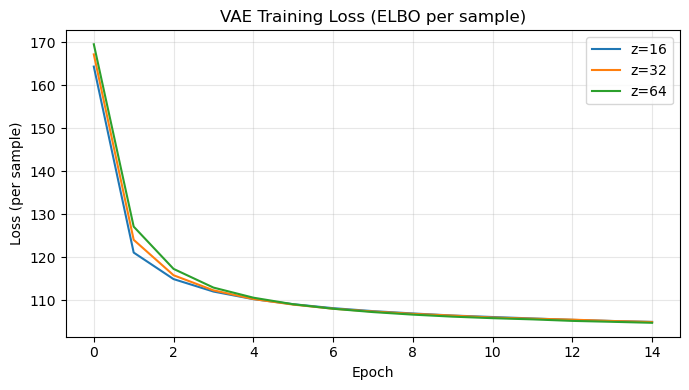

In [20]:
# --- Plot training loss (VAE) ---
plt.figure(figsize=(7, 4))

for ld in latent_dims:
    plt.plot(vae_results[ld]["losses"], label=f"z={ld}")

plt.title("VAE Training Loss (ELBO per sample)")
plt.xlabel("Epoch")
plt.ylabel("Loss (per sample)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## VAE Reconstructions (Training Set)

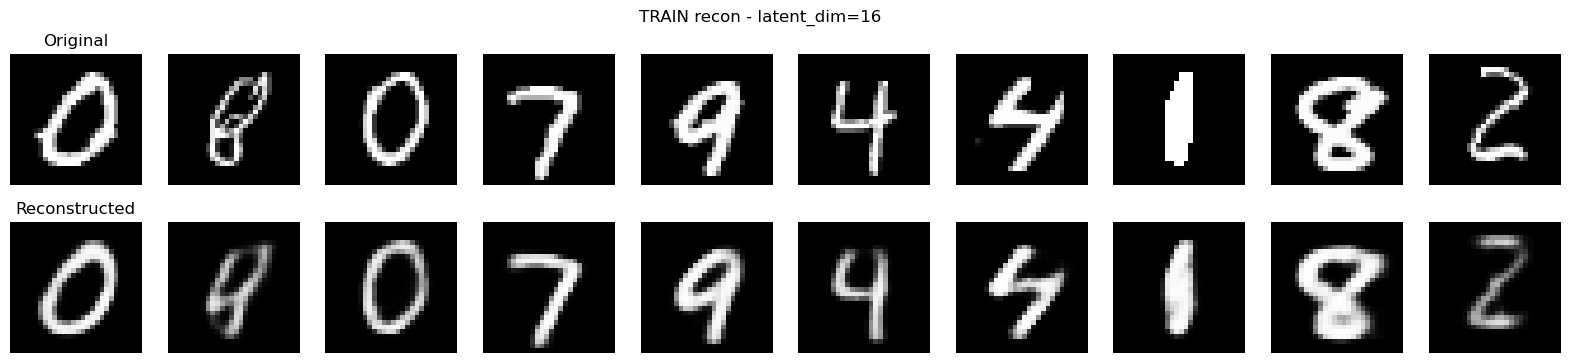

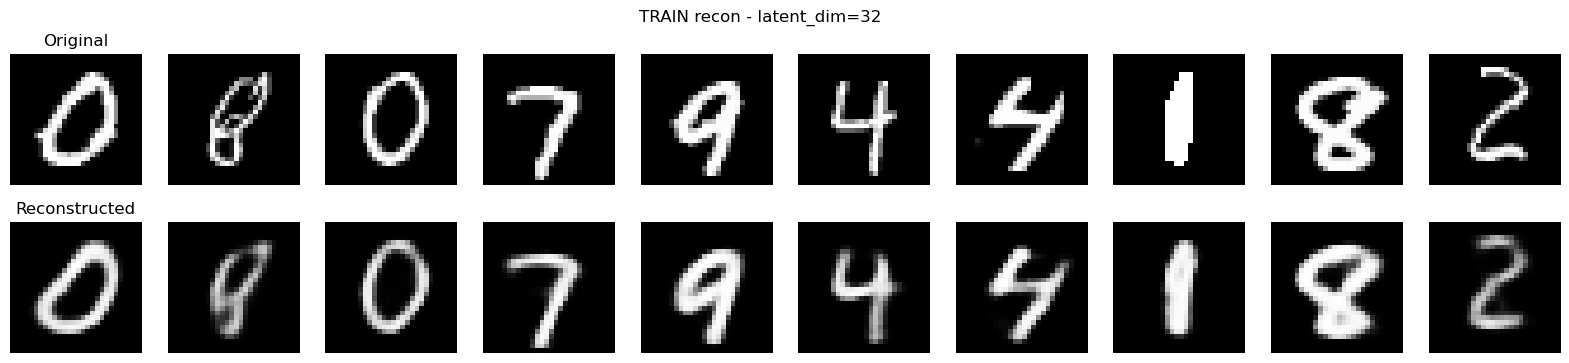

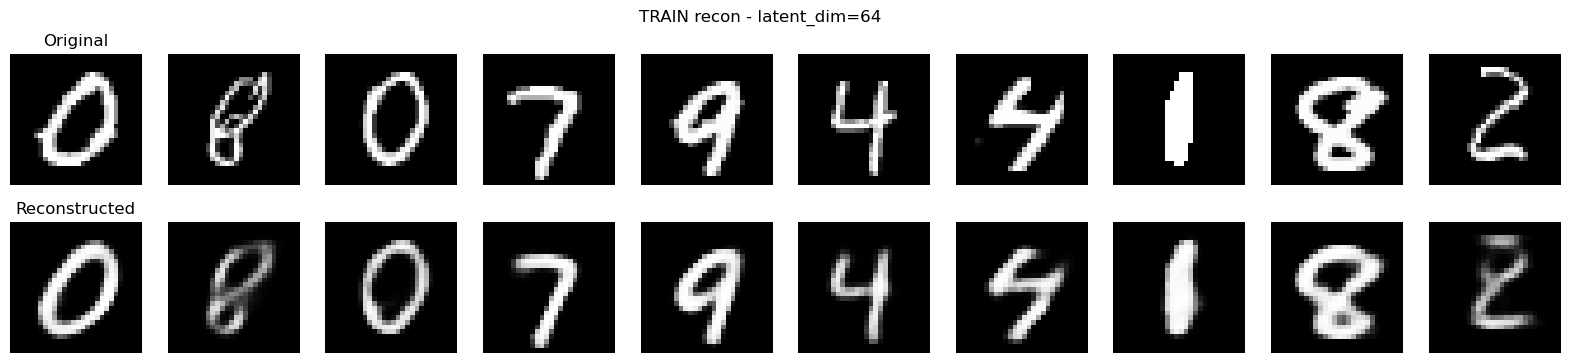

In [26]:
def show_vae_reconstructions_like_part1(model, x_data, n=10, title="VAE Reconstructions"):
    model.eval()
    with torch.no_grad():
        xb = x_data[:n].to(device)     
        x_hat, _, _ = model(xb)            

    xb = xb.cpu().numpy()
    x_hat = x_hat.cpu().numpy()

    plt.figure(figsize=(2*n, 4))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(xb[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        if i == 0:
            plt.title("Original")

        plt.subplot(2, n, n+i+1)
        plt.imshow(x_hat[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
        if i == 0:
            plt.title("Reconstructed")

    plt.suptitle(title)
    plt.show()

rng = np.random.default_rng(0)
train_idx = rng.choice(x_train_t.shape[0], size=10, replace=False)
x_train_rand10 = x_train_t[train_idx]

for ld in [16, 32, 64]:
    show_vae_reconstructions_like_part1(
        vae_results[ld]["model"],
        x_train_rand10,
        n=10,
        title=f"TRAIN recon - latent_dim={ld}"
    )


## Final Test Loss Comparison (VAE)
This cell evaluates the trained VAE models on the test set and prints the test ELBO (per sample) for latent dimensions 16, 32, and 64.

In [27]:
def eval_vae(model, loader):
    model.eval()
    total_loss = 0.0
    n_samples = 0

    with torch.no_grad():
        for (xb,) in loader:     # <-- IMPORTANT FIX
            xb = xb.to(device)
            x_hat, mu, logvar = model(xb)
            loss = vae_loss(xb, x_hat, mu, logvar)

            total_loss += loss.item()
            n_samples += xb.size(0)

    return total_loss / n_samples

print("\n--- Final Test Loss Comparison (VAE) ---")
for ld in [16, 32, 64]:
    test_loss = eval_vae(vae_results[ld]["model"], test_loader)
    print(f"Latent Dim {ld:<2} -> Test Loss (ELBO per sample): {test_loss:8.4f}")


--- Final Test Loss Comparison (VAE) ---
Latent Dim 16 -> Test Loss (ELBO per sample): 104.4503
Latent Dim 32 -> Test Loss (ELBO per sample): 104.6175
Latent Dim 64 -> Test Loss (ELBO per sample): 104.1422


## VAE Reconstructions (Test Set)
This cell visualizes 10 original MNIST test images and their reconstructions for latent dimensions 16, 32, and 64.

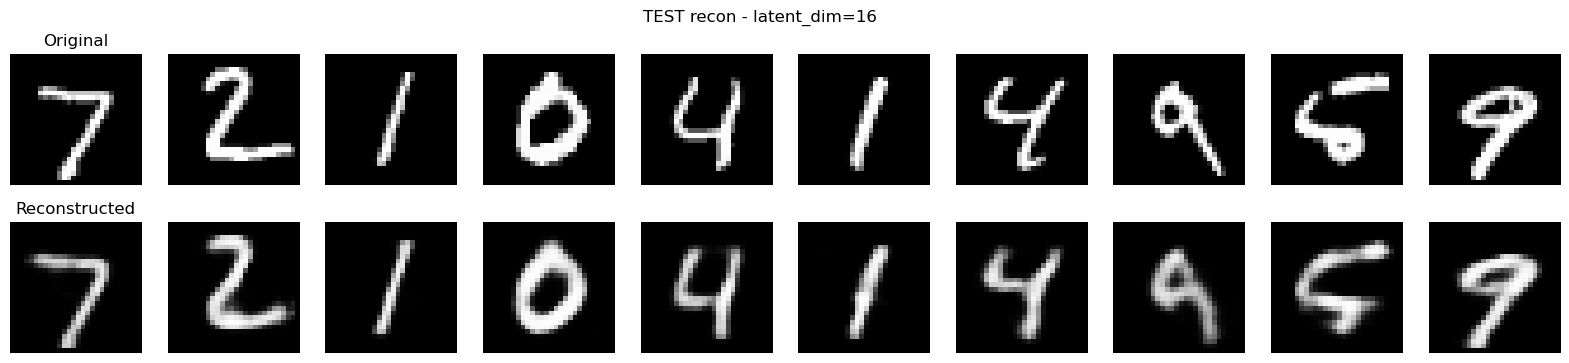

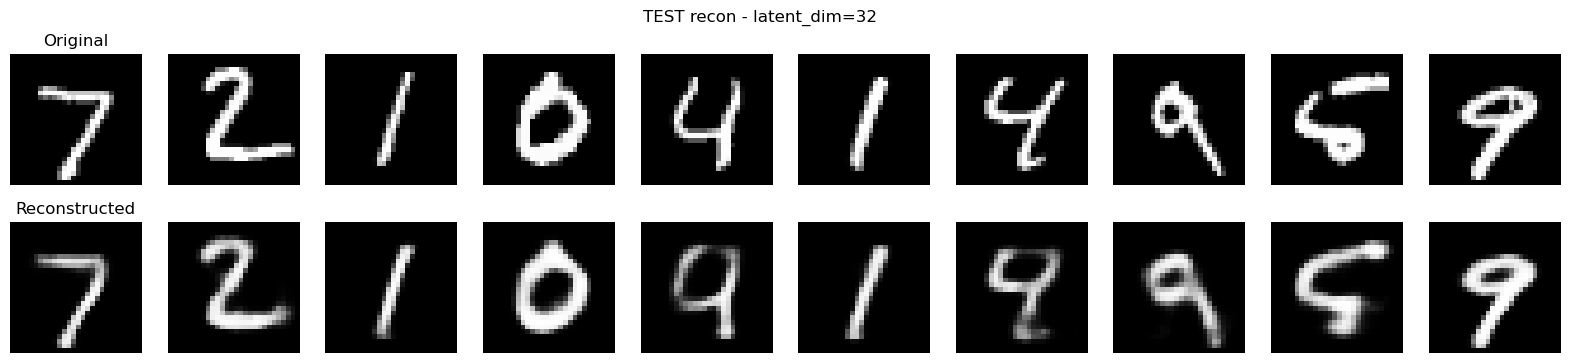

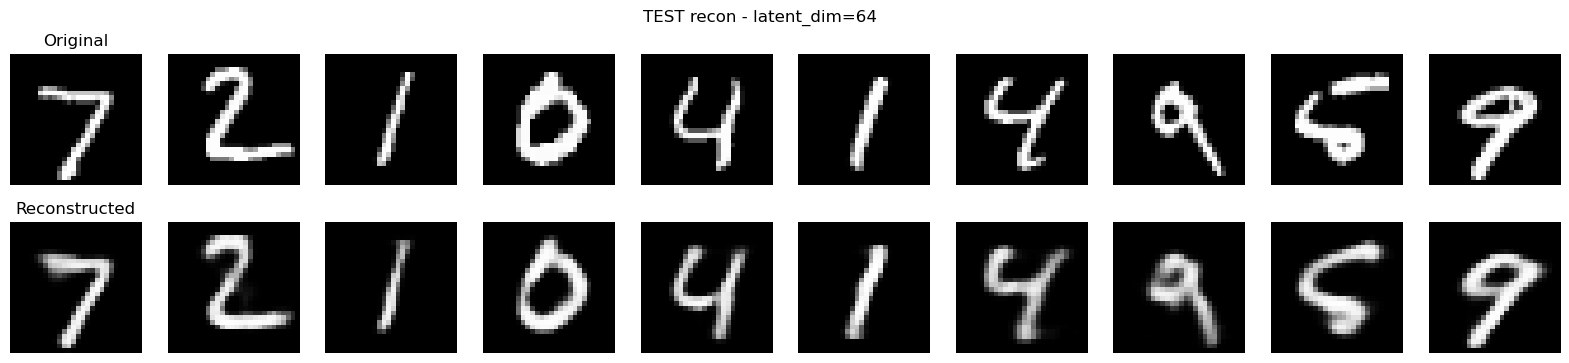

In [31]:
import matplotlib.pyplot as plt
import torch

x_test_batch = x_test_t

for ld in [16, 32, 64]:
    show_vae_reconstructions_like_part1(
        vae_results[ld]["model"],
        x_test_batch,
        n=10,
        title=f"TEST recon - latent_dim={ld}"
    )


# Structure in Embeddings (VAE – PyTorch)  |  Latent Interpolation
# This section studies the structure of the VAE latent space by
# linearly interpolating between two MNIST *training* images in
# latent space and decoding the intermediate points.
# We repeat the procedure for:
#   (1) two images of the same digit (if labels are available)
#   (2) two images of different digits (if labels are available)

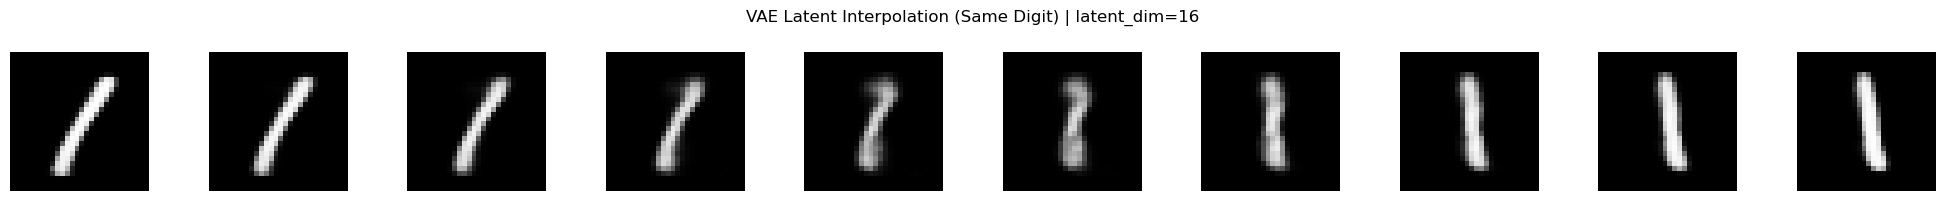

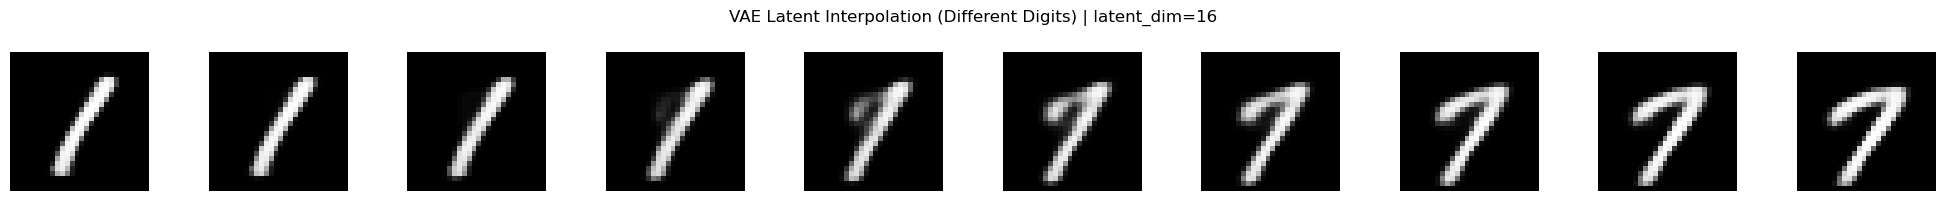

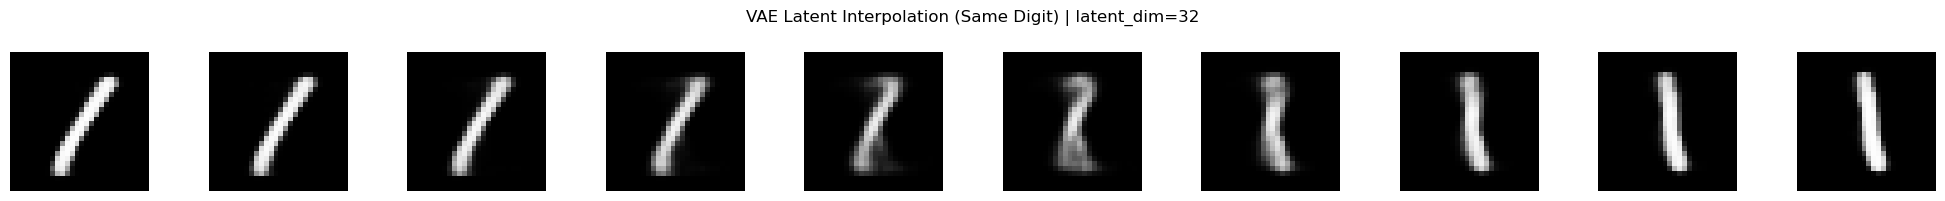

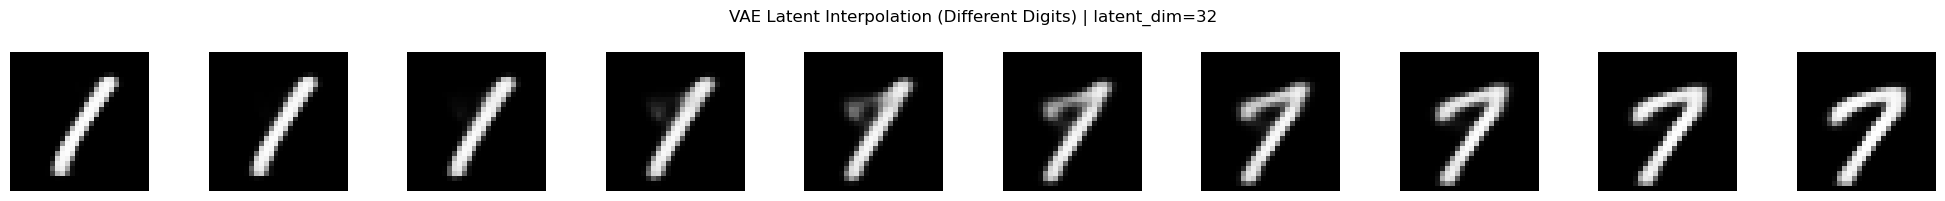

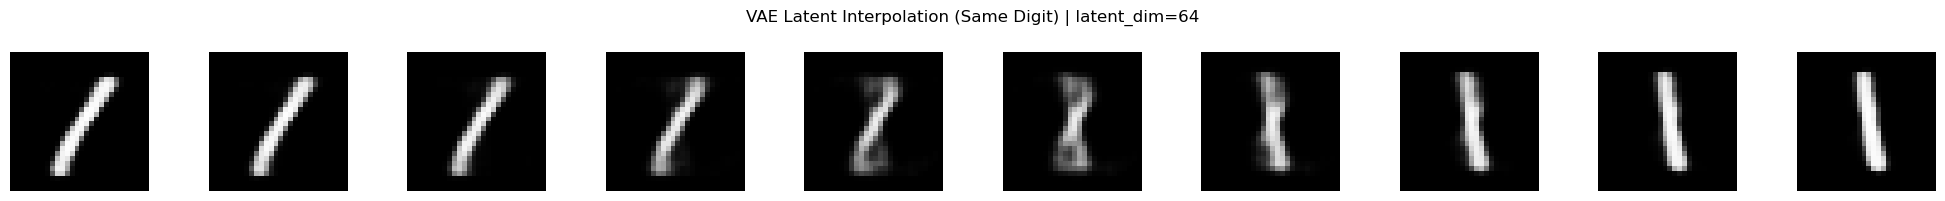

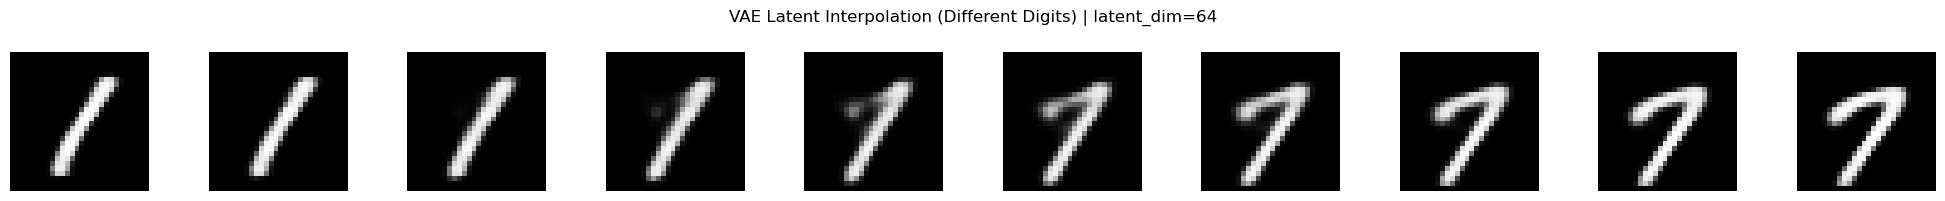

In [29]:
import torch
import matplotlib.pyplot as plt

def pick_pair_indices(y_train=None, same_digit=True, d1=1, d2=7):
    """
    Pick indices from the MNIST training set.
    - If y_train is available: choose true same-digit / different-digit pairs.
    - If y_train is not available: fall back to fixed indices (still valid selection from training set).
    """
    if y_train is None:
        return (0, 1) if same_digit else (0, 1000)

    y = torch.as_tensor(y_train)
    if same_digit:
        idx = (y == d1).nonzero(as_tuple=True)[0]
        return int(idx[0].item()), int(idx[1].item())
    else:
        idx1 = (y == d1).nonzero(as_tuple=True)[0]
        idx2 = (y == d2).nonzero(as_tuple=True)[0]
        return int(idx1[0].item()), int(idx2[0].item())

def vae_latent_interpolation(model, x_data, idx1=0, idx2=1, steps=10, title="VAE Latent Interpolation"):
    """
    Interpolate between two training images in latent space using the VAE encoder (mu),
    decode intermediate latent points, and visualize the smooth transition.
    """
    model.eval()
    with torch.no_grad():
        # pick 2 samples (must be from training set)
        x1 = x_data[idx1:idx1+1].to(device)  # (1, 784)
        x2 = x_data[idx2:idx2+1].to(device)  # (1, 784)

        # encode -> use mu for a clean interpolation path
        mu1, logvar1 = model.encode(x1)
        mu2, logvar2 = model.encode(x2)

        # linear interpolation in latent space
        alphas = torch.linspace(0, 1, steps).to(device)               # (steps,)
        zs = (1 - alphas).unsqueeze(1) * mu1 + alphas.unsqueeze(1) * mu2  # (steps, latent_dim)

        # decode
        x_interp = model.decode(zs).cpu().numpy()  # (steps, 784)

    # plot
    plt.figure(figsize=(2*steps, 2))
    for i in range(steps):
        plt.subplot(1, steps, i+1)
        plt.imshow(x_interp[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Run interpolation experiments
# -----------------------------

# Use MNIST *training* tensor (N, 784)
x_train_batch = x_train_t.to(device)

# If labels exist, use them (otherwise fallback pair selection will be used)
labels = None
try:
    labels = y_train
except NameError:
    labels = None

for ld in [16, 32, 64]:
    model = vae_results[ld]["model"]

    # (1) Same digit pair (preferred if labels exist)
    i1, i2 = pick_pair_indices(labels, same_digit=True, d1=1)
    vae_latent_interpolation(
        model, x_train_batch,
        idx1=i1, idx2=i2,
        steps=10,
        title=f"VAE Latent Interpolation (Same Digit) | latent_dim={ld}"
    )

    # (2) Different digit pair (preferred if labels exist)
    j1, j2 = pick_pair_indices(labels, same_digit=False, d1=1, d2=7)
    vae_latent_interpolation(
        model, x_train_batch,
        idx1=j1, idx2=j2,
        steps=10,
        title=f"VAE Latent Interpolation (Different Digits) | latent_dim={ld}"
    )

### Analysis
For images of the same digit, the decoded interpolations typically change smoothly while preserving overall digit identity, indicating that similar inputs map to nearby latent regions.  
For different digits, the transition gradually shifts digit shape and identity, suggesting that the latent space captures meaningful semantic structure rather than memorizing individual images.

## Generative Capability: Sampling from the VAE
This cell samples random latent vectors from **N(0, I)** and decodes them to generate new MNIST-like images for latent dimensions 16, 32, and 64.

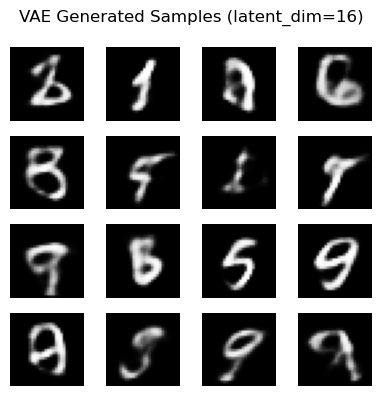

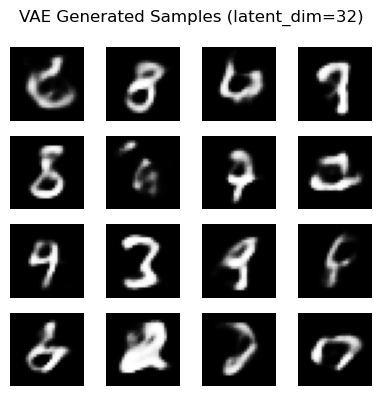

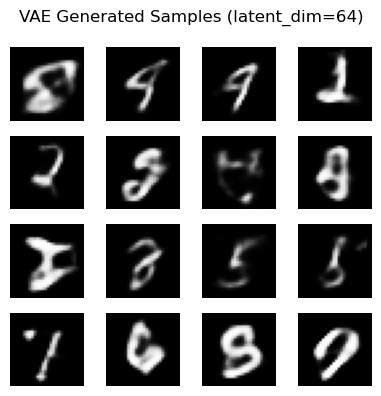

In [30]:
import torch
import matplotlib.pyplot as plt

def sample_from_vae(model, n=16, title="VAE Generated Samples"):
    model.eval()
    with torch.no_grad():
        # Sample z ~ N(0, I) with correct latent size
        latent_dim = model.fc_mu.out_features
        z = torch.randn(n, latent_dim).to(device)

        # Decode samples
        samples = model.decode(z)  # (n, 784)

    samples = samples.cpu().numpy()

    plt.figure(figsize=(4, 4))
    for i in range(n):
        plt.subplot(4, 4, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap="gray", vmin=0, vmax=1)
        plt.axis("off")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Generate samples for each latent size
for ld in [16, 32, 64]:
    sample_from_vae(
        vae_results[ld]["model"],
        n=16,
        title=f"VAE Generated Samples (latent_dim={ld})"
    )


## Part 2 Discussion (VAE)
- The VAE loss combines reconstruction error and KL divergence, encouraging the latent space to follow a standard normal distribution.
- Increasing latent dimension generally improves reconstruction quality, but may reduce regularization and can affect the smoothness of generated samples.
- Unlike the standard autoencoder, the VAE can generate new images by sampling z ~ N(0, I) and decoding it.

Important: Please read the questions and #TODOs carefully to implement all the steps to complete the assignment. You may add or subtract methods to the python scripts according to your needs. Feel free to e-mail ergunesr@itu.edu.tr for your questions.  

## Comparison of Standard Autoencoders and Variational Autoencoders

After implementing both the standard autoencoder and the variational autoencoder, we compare their performance in terms of reconstruction quality.

### Reconstruction Quality

Reconstructed images from both models were compared using **10 training samples** and **10 test samples**.

The standard autoencoder generally produces **sharper and more accurate reconstructions**, as it directly optimizes reconstruction error in a deterministic manner. Fine details such as stroke thickness and digit edges are often better preserved, especially for larger hidden dimensions.

In contrast, the variational autoencoder produces reconstructions that are sometimes **slightly blurrier**. This behavior is expected, since the VAE introduces stochasticity through the latent variable sampling and enforces a regularized latent space using KL divergence. While this can slightly reduce reconstruction fidelity, it enables meaningful latent space structure and generative capability.

Overall, the standard autoencoder is better suited for tasks that prioritize reconstruction accuracy, whereas the variational autoencoder provides a trade-off between reconstruction quality and the ability to generate new samples.
